# Mohamed Anwar Abouabdallah
# Analyse Numerique II : 
                        
  # Tp 2 : Etalement d'une goutte mathématique

## Presentation :



## Introduction :
On regarde une goutte liquide déposée sur une surface plane horizontale.  On suppose, à l'instant
initiale, que le support de la goutte (surface de contact liquide/solide) est un cercle et que cette
symétrie sphérique est conservée au cours du temps.

## Objective : Trouver le temps nécessaire, a notre goutte, pour arriver  à la position d'équilibre

## Partie préliminaire :

 *  Le calcul du volume se fait par cette integration 
     $ V=  2 \pi\int_{0}^{a(t)} r h(r,t) dr $
          
      $$ V = \frac{\pi\alpha(t)a^4(t)}{2}  $$ 

    Ce qui nous donne après intégration  : 
    $$ \alpha(t) = \frac{2V}{\pi a(t)^4} $$
    
* A partir de la question précédente :
       
     $h(a(t),t) = \alpha(t)(a^2(t)-r^2) = \frac{2V(a^2(t)-r^2)}{\pi a(t)^4} $
     
     $ \Rightarrow \frac{dh(a(t),t)}{dr} = -\alpha(t)a(t) $ 

* La goutte est a l'équilibre quand sa vitesse radial s'annulle c'est à dire $ \theta(t)=\theta_0$:
  
  Ce qui conduit à :
    
    $$\frac{dh(a(t),t)}{dr} = \tan(\theta_0) $$
    
    $$ \Rightarrow \int_{0}^{a(t)} \frac{dh(a(t),t)}{dr} $$
    
    
   $$\Rightarrow a_T=\frac{tan(\theta_0) \, \pi a^4(t)}{4V}$$

# Partie I :
## Euler implicite  à  pas constant :


Pour cette partie on prendra  :

* $V = \frac{\pi}{2} $

*  $\tan(\theta_0) = \frac{1}{9}$

* Un rayon initiale $ a_0 = 1$.

On commence par annoncer ses condition et crée nos fonctions surface et dh

In [63]:
v =pi/2;
a0=1;
t=0:1:60;
theta= 0.1111
theta0 = 0.1111
t[5]

4

In [64]:
function surface(alpha, a, r)
    s=(alpha^2)*(a^2-r^2)
end

function alpha(a)
    return(2*V)/(pi*a^4)
end

function dh(a)
    return (-2*alpha(a)*a)
end


dh (generic function with 1 method)

Puis on utilise le schéma d'euler implicite afin de l'approximer :

In [65]:


function eulerexplicite(an,tau)
    return an+tau*(-atan(dh(an))-theta)
end 

eulerexplicite (generic function with 1 method)

In [66]:
l = []
V = pi/2
precision = 100000
tau = 1/precision
an = 1
for i=1:(60*precision)
    append!(l,an)
    an = eulerexplicite(an,tau)
    if an==l[length(l)]
        print(length(l))
        return 
        
    end
end

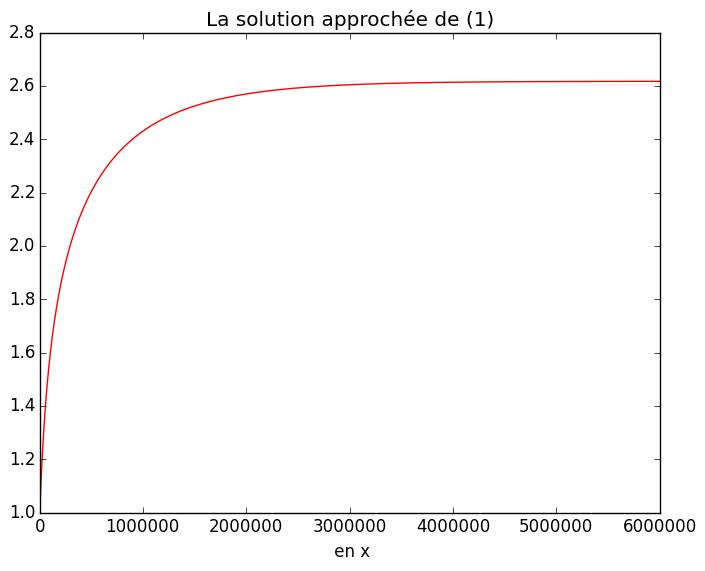

PyObject <matplotlib.text.Text object at 0x7f3962bc50d0>

In [67]:
using PyPlot


plot(l,color="red")
title("La solution approchée de (1)")
xlabel(" en x ") #ylabel



In [68]:
b=maximum(l)

2.6169322748578296

In [69]:
a=0

for i in 1:length(l)
    if (l[i] > 2.61)
        a=i
        break
    end 
end 
a
a/precision


34.6952

In [70]:
print("la valeur de T est " , a/precision, " avec n= " ,precision)


la valeur de T est 34.6952 avec n= 100000

In [71]:
t=60
tau=1e-4
n=Int(t/tau)
an=1



a=eulerexplicite(an,tau)


1.0000996048717794

Ici on va s'interresser au profile de la goute d'eau :

In [72]:
a=zeros(n+1)
a[1]=an
for i in 1:length(a)-1
    a[i+1]=eulerexplicite(a[i], tau)
    a
end
a

600001-element Array{Float64,1}:
 1.0    
 1.0001 
 1.0002 
 1.0003 
 1.0004 
 1.0005 
 1.0006 
 1.0007 
 1.0008 
 1.0009 
 1.001  
 1.00109
 1.00119
 ⋮      
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693
 2.61693

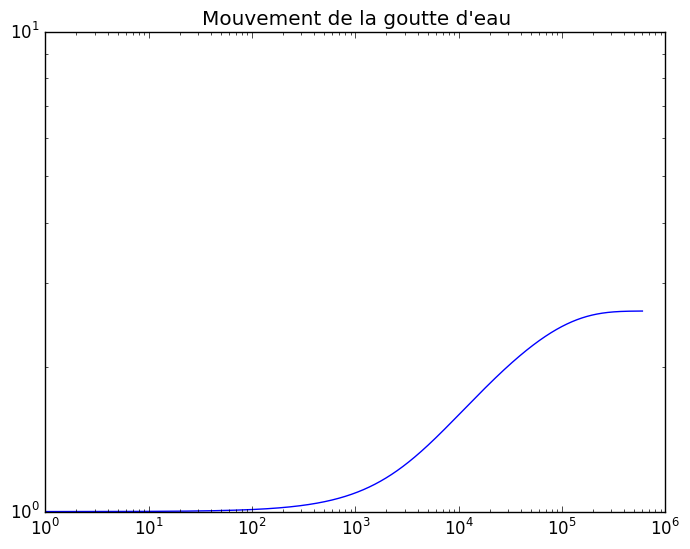

PyObject <matplotlib.text.Text object at 0x7f39627b0a90>

In [81]:
using PyPlot
loglog(a)
title("Mouvement de la goutte d'eau")


In [82]:

at = a
for i in 1:length(a)-1
    at[i+1]=eulerexplicite(a[i], tau)
end

at

600001-element Array{Float64,1}:
 1.0    
 1.00001
 1.00002
 1.00003
 1.00004
 1.00005
 1.00006
 1.00007
 1.00008
 1.00009
 1.0001 
 1.00011
 1.00012
 ⋮      
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973
 2.26973

In [83]:
function h(r,a)
   return (alpha(a)*(a^2-r^2)) 
end

h (generic function with 1 method)

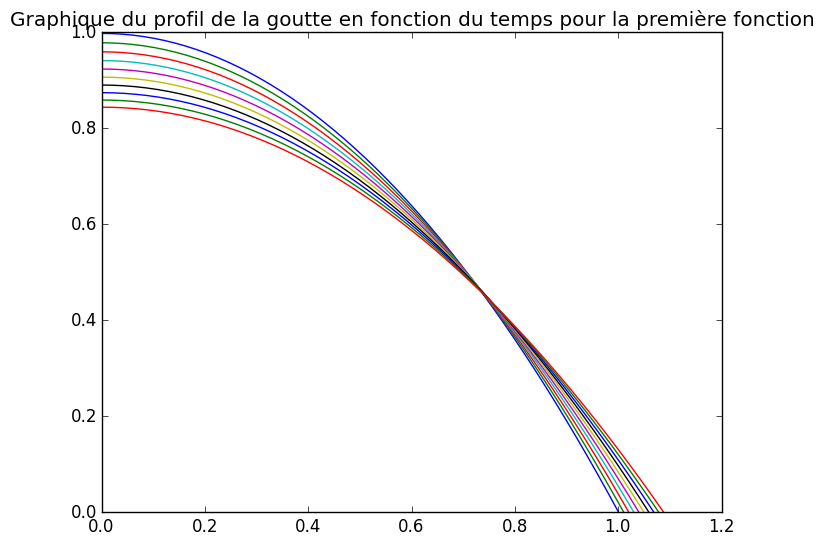

PyObject <matplotlib.text.Text object at 0x7f3962016dd0>

In [120]:

for i in 100:1000:10000
    a1 = at[i]
    r = linspace(0,a1)
    plot(r,h(r,a1))
end
title("Graphique du profil de la goutte en fonction du temps pour la première fonction ")

## Interpretation :

* Le premier graphique représente la solution de (1) approximée par une méthode euler explicite. On peut remarquer que le rayon tend vers sa position d'équilibre théorique, ce qui permet de dire que meme si on amzlliore  la précisionnous n'allons pas retrouver la position d'équilibre. 

* Le troisième grphique trace les différents profiles de la goutte d'eau au cours du temps, on peut dire que a(t) tend vers 1.

En ce qui nous concerne on a pris n=100000, ce qui veut dire qu'on obtiendra notre meilleur solution par rapport à la précision utilisée en ce T. 


## Partie II :

* Ici on va prendre la fonction $ g :x \rightarrow \sqrt{|x|}$  

In [115]:
function eulerexplicitebis(an,tau)
    return an+tau*sqrt(abs((-atan(dh(an))-theta0)))
end 

eulerexplicitebis (generic function with 1 method)

In [116]:
l2 = []
V = pi/2
precision = 100000
tau = 1/precision
an = 1
for i=1:(10*precision)
    append!(l2,an)
    an = eulerexplicitebis(an,tau)
    if an==l2[length(l2)]
        print(length(l2))
        return 
        
    end
end
    

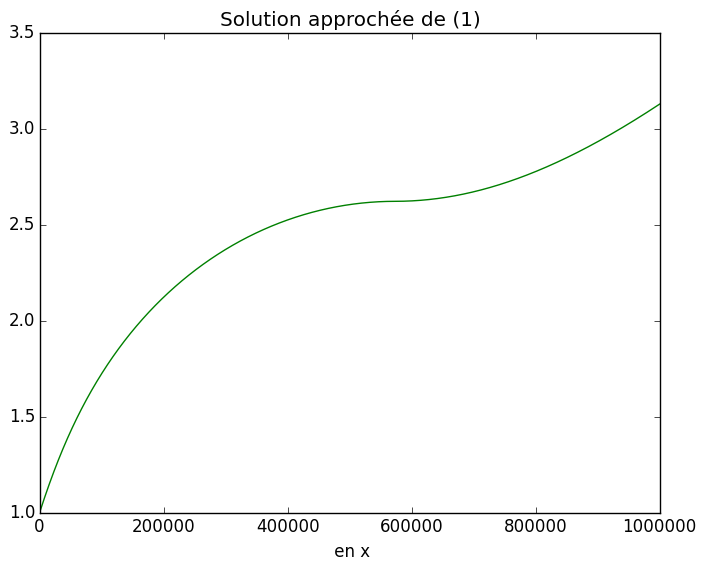

PyObject <matplotlib.text.Text object at 0x7f3961cf9a50>

In [117]:
T =a/precision
plot(l2,color="green")
title("Solution approchée de (1)")
xlabel(" en x ") #ylabel


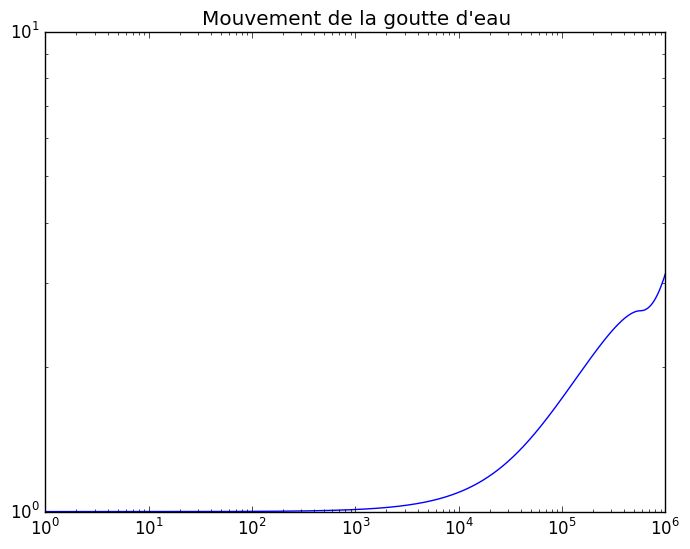

PyObject <matplotlib.text.Text object at 0x7f3961b24c90>

In [118]:
loglog(l2)
title("Mouvement de la goutte d'eau")


## Interpretation :

* Dans le premier graphique, la position d'équilibre est atteinte mais l'algorithme ne permet pas de stabilisé le rayon et la position d'équilibre est largement ce qui permet d'expliquer la courbure.


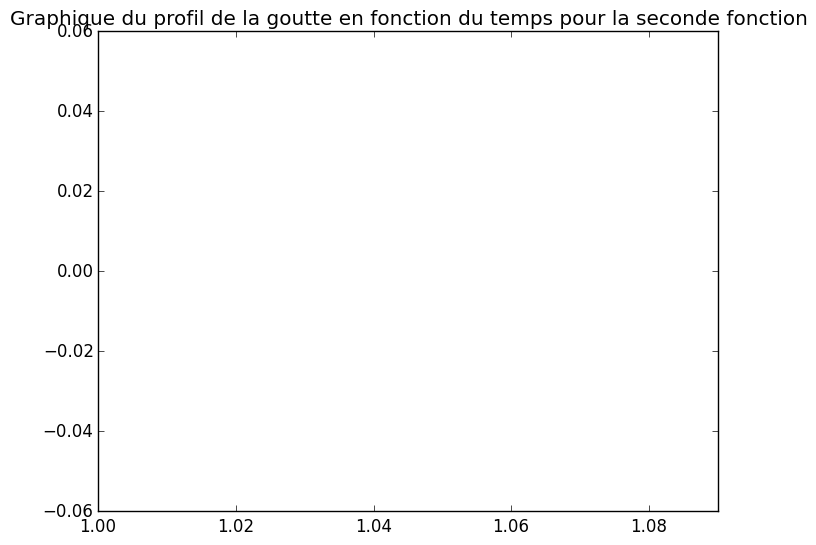

PyObject <matplotlib.text.Text object at 0x7f395d688790>

In [127]:
t=10
a=zeros(n+1)
a[1]=1
at = a
for i in 1:length(a)-1
    at[i+1]=eulerexplicitebis(at[i], tau)
end


for i in 100:1000:10000
    a2 = at[i]
    r = a2
    plot(r,h(r,a2))
end

title("Graphique du profil de la goutte en fonction du temps pour la seconde fonction")

#  Partie III :


Pour la partie 3 je commencerais par prendre un $\mu=0.01 $
* Dans un premier temps nous allons utiliser Ici on va prendre la fonction $ g :x \rightarrow x$  

In [89]:
mu=0.01


0.01

In [90]:
function algodeselect(epsilone)
    if abs(epsilone) < 0.9*mu
        return (1)
    elseif abs(epsilone)> 1.1*mu
        return (2)
    else 
        return (3)
    end
end


algodeselect (generic function with 1 method)

Ici on va implementer nos méthodes de derrivation :
* Pour la fonction : $  g :x \rightarrow \sqrt{|x|}$  

In [91]:
beta=1/2
function df(a,tau)
    dv=(((12*V)/(pi*(a^4)))/(1+(16*V^2)/(pi^2*a^6)))
    v=(-atan(dh(a))-theta0)
    return (1+tau*beta*dv*(abs(v)^(beta-1)))
end 

df (generic function with 1 method)

* Ensuite pour la fonction :$ g :x \rightarrow x$  

In [92]:
function NDer(a, t,n)
    h=t[n+1] -t[n];
    return (-atan(dh(a+h))+-atan(dh(a+h))/(h))
end 






NDer (generic function with 1 method)

In [93]:
t

60

* Dans un premier temps nous allons utiliser Ici on va prendre la fonction $ g :x \rightarrow x$  

In [94]:
function eulerexplicitest2(an,tau,n,epsilone0) #idéal mais ne marche pas
    epsilone= [epsilone0]
    bat =0
    tau1=[tau]
    k=1
    while (sum(tau)< 60 && k< 10000)
        if algodeselect(epsilone[k])==1
            s = tau
            append!(tau1,s)
            k=k+1
        elseif algodeselect(epsilone[k])==2
            s=tau*sqrt(mu/abs(epsilone[k]))
            append!(tau1,s)
            k=k+1
        else   
            s=tau*sqrt(mu/abs(epsilone[k]))
            s=tau[k-1]
        end
        bat= (0.5*s^2)*NDer(a,t,k)
        append!(epsilone,bat)       
    end
    return an+tau*bat
end


eulerexplicitest2 (generic function with 2 methods)

In [95]:


function epsilon(a,tau)
    return ((tau^2)/2)*df(a,tau)
end

epsilon (generic function with 1 method)

In [96]:
function f(x)
    return x
end

f (generic function with 1 method)

In [102]:


function eulerpartie3(a,tau)
    for i in 1:n
        x=-atan(dh(a[i]))-theta;
        a[i+1]=a[i]+tau*(abs(x))
        eps=abs(epsilon(a[i],tau))
        if(eps>=0.9*nu) & (eps<=1.1*nu)
            tau=tau;
        elseif(eps<0.9*nu)
            tau=tau*sqrt(nu/eps)
        else
            tau=tau*sqrt(nu/eps)
    end
end
    return a
end

eulerpartie3 (generic function with 1 method)

In [105]:
theta0=atan(1/9)
theta =theta0
nu=1e-2
t=10
n=Int(t/tau)
a=zeros(n+1)
a[1]=1


LoadError: [91mInexactError()[39m

In [99]:
r=zeros(n+1)
res=zeros(n+1)
for i in 1:n
   r[i]=a[i]/n
    res[i]=h(r[i],a[i])
end
res

600001-element Array{Float64,1}:
 1.0     
 0.99998 
 0.99996 
 0.99994 
 0.99992 
 0.9999  
 0.99988 
 0.999861
 0.999841
 0.999821
 0.999801
 0.999781
 0.999761
 ⋮       
 0.194112
 0.194112
 0.194112
 0.194112
 0.194112
 0.194112
 0.194111
 0.194111
 0.194111
 0.194111
 0.194111
 0.0     

In [100]:
b=eulerpartie3(a,tau)
b

600001-element Array{Float64,1}:
 1.0    
 1.00001
 1.14093
 1.2571 
 1.35299
 1.42958
 1.49553
 1.55321
 1.60434
 1.65019
 1.69168
 1.72954
 1.76432
 ⋮      
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074
 2.62074

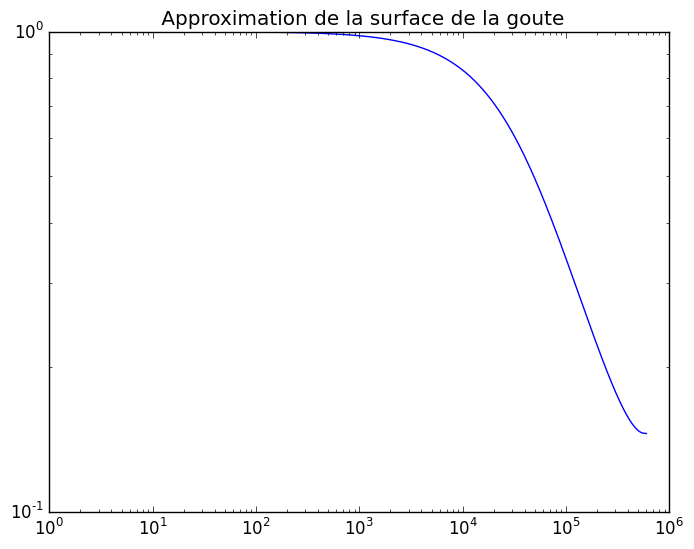

PyObject <matplotlib.text.Text object at 0x7f395d39a190>

In [131]:
loglog(res)
title(" Approximation de la surface de la goute")

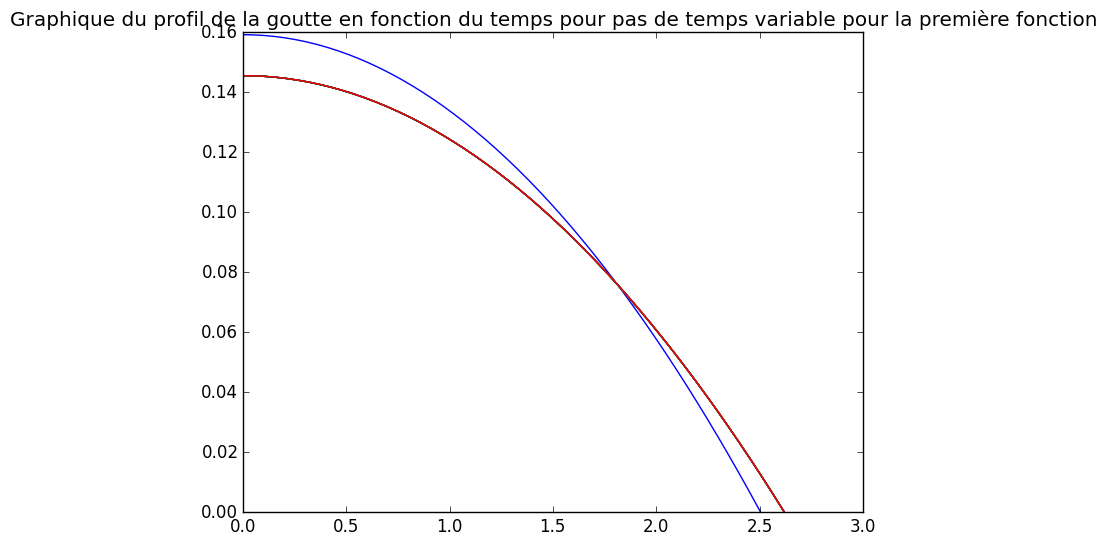

PyObject <matplotlib.text.Text object at 0x7f3961f02c90>

In [122]:


a=zeros(n+1)
a[1]=1
alpha(a) = 2*V/(pi*a^4)
h(r,a) = alpha(a)*(a^2 - r.^2)
a_t = eulerpartie3(a,tau)

for i in 100:1000:10000
    
    a = a_t[i]
    r = linspace(0,a)
    plot(r,h(r,a))

end
title("Graphique du profil de la goutte en fonction du temps pour pas de temps variable pour la première fonction")

## Interpretation :
On remarque que nos deux courbes sont presque identiques ce qui permettrait de dire que  $\tau$ est donc proportionnel à la valeur de a(t). 
Ainsi plus on diminuera  le pas de temps plus on gagnera en précision, cependant on perdra en temps de calcul. 


### Question 2:
Ici on va prendre la fonction $ g :x \rightarrow \sqrt{|x|}$  

In [60]:
function eulerpartie3bis(a,tau)
    for i in 1:n
        x=-atan(dh(a[i]))-theta;
        a[i+1]=a[i]+tau*(sqrt(abs(x)))
        eps=abs(epsilon(a[i],tau))
        if(eps>=0.9*nu) & (eps<=1.1*nu)
            tau=tau;
        elseif(eps<0.9*nu)
            tau=tau*sqrt(nu/eps)
        else
            tau=tau*sqrt(nu/eps)
    end
end
    return a
end




eulerpartie3bis (generic function with 1 method)

In [61]:
a=zeros(n+1)
a[1]=1
alpha(a) = 2*V/(pi*a^4)
h(r,a) = alpha(a)*(a^2 - r.^2)
a_t = eulerpartie3bis(a,tau)

100001-element Array{Float64,1}:
    1.0    
    1.0001 
    1.14126
    1.2694 
    1.38459
    1.48311
    1.57238
    1.65369
    1.72816
    1.79671
    1.86008
    1.91889
    1.97363
    ⋮      
 4628.76   
 4628.81   
 4628.86   
 4628.9    
 4628.95   
 4628.99   
 4629.04   
 4629.09   
 4629.13   
 4629.18   
 4629.23   
 4629.27   

In [147]:



a=zeros(n+1)
a[1]=a0
a=eulerpartie3bis(a,tau)
r=zeros(n+1)
res=zeros(n+1)
for i in 1:n
   r[i]=a[i]/n
    res[i]=h(r[i],a[i])
end
res

600001-element Array{Float64,1}:
 1.0       
 0.99998   
 0.767875  
 0.620658  
 0.521669  
 0.454659  
 0.404495  
 0.365691  
 0.334851  
 0.309786  
 0.289036  
 0.27159   
 0.256733  
 ⋮         
 1.29582e-9
 1.29582e-9
 1.29581e-9
 1.29581e-9
 1.2958e-9 
 1.2958e-9 
 1.2958e-9 
 1.29579e-9
 1.29579e-9
 1.29578e-9
 1.29578e-9
 0.0       

In [146]:
a

2.620741394207138

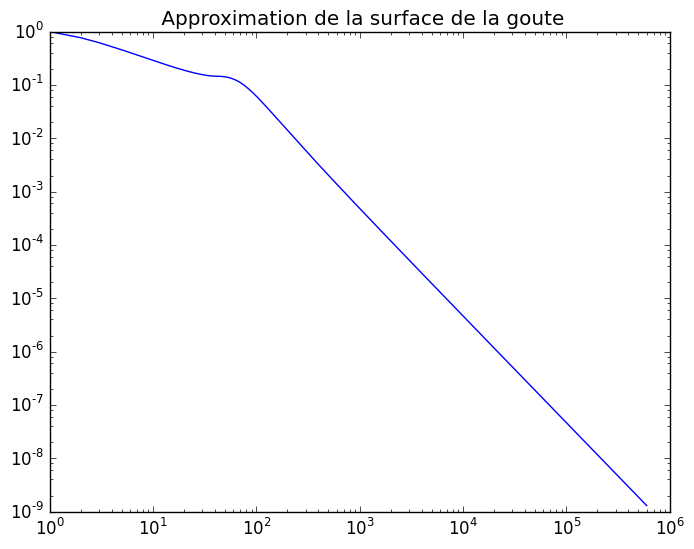

PyObject <matplotlib.text.Text object at 0x7f395cbbb390>

In [142]:
loglog(res)
title(" Approximation de la surface de la goute")

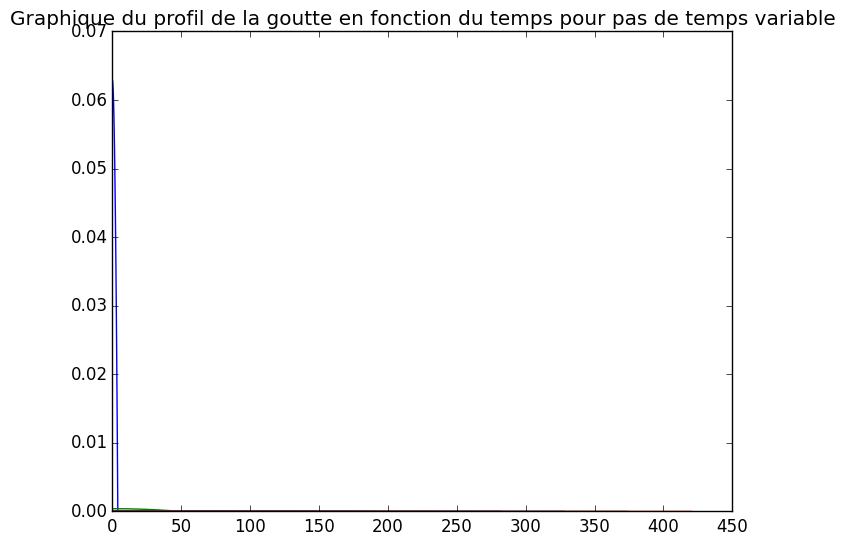

PyObject <matplotlib.text.Text object at 0x7f395c775f90>

In [149]:
#EulerExplicite(a0,6000,1e-2)
for i in 100:1000:10000
    
    a1 = a[i]
    r = linspace(0,a1)
    plot(r,h(r,a1))

end
title("Graphique du profil de la goutte en fonction du temps pour pas de temps variable")


## Interprétation : 
* Contrairement à la question précédante, nos courbes évoluent différement, afin d'interprêter cela je dirais que nos deux courbes évoluent différement. Cela pour être expliquer par le fait que peut le fait que l'erreur soit bloquée dans le premier cas à cause de $\tau$ réstée bloquée au dessous de 1 et donc : $\tau$ > $\tau^2$ ce qui fait que notre solution décrois.